# Ingorwn Body of the Program & Just Show Images in Notebook

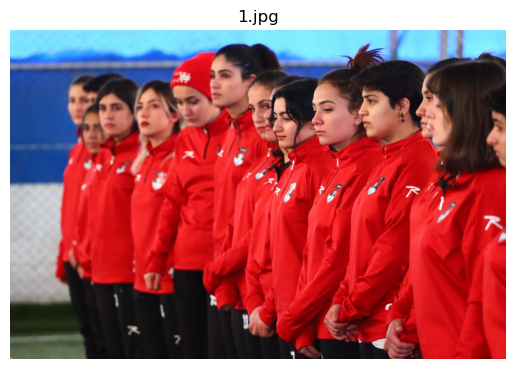

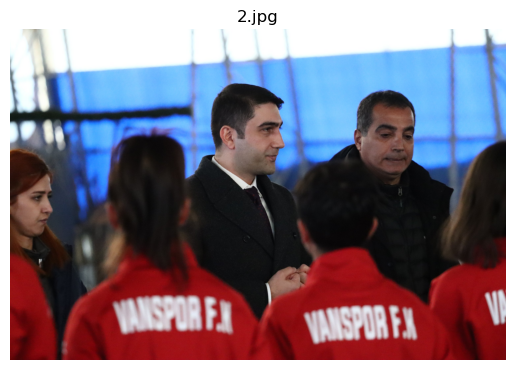

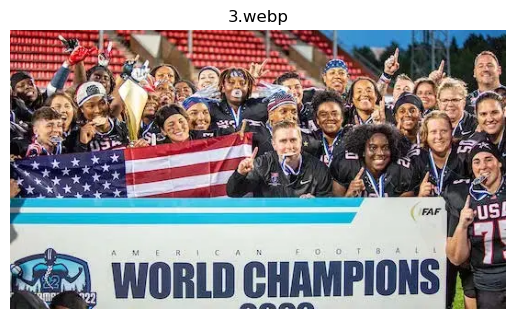

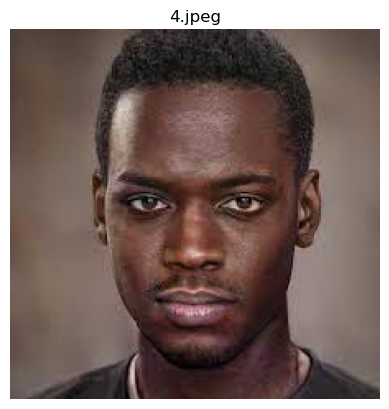

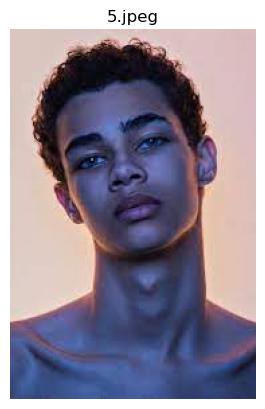

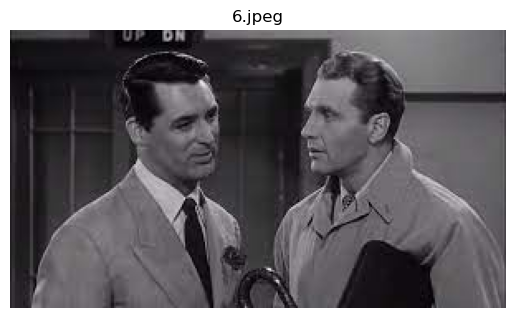

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from utils.convolution import ConvolutionProcessor
from utils.image_processor import ImageProcessor
from utils.face_detector import FaceDetector

def test_kernels(input_dir: str):
    conv_processor = ConvolutionProcessor()

    for file in os.listdir(input_dir):
        file_path = os.path.join(input_dir, file)
        image = cv2.imread(file_path)
        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        identity = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
        sobel_left = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
        blur = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
        random = np.random.rand(3, 3)

        # Apply the blur kernel (or any other kernel of your choice)
        convolved_image = conv_processor.apply(rgb, blur)
        
        # Display the convolved image
        plt.imshow(convolved_image)
        plt.title(file)
        plt.axis('off')
        plt.show()
    
def filter_frontfaces(input_dir: str, output_dir: str):
    processor = ImageProcessor()
    face_detector = FaceDetector()

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for file in os.listdir(input_dir):
        file_path = os.path.join(input_dir, file)

        if processor.is_bnw(file_path):
            continue

        faces = face_detector.detect_faces(file_path)
        if faces:
            features = face_detector.face_features(faces)
            is_front, calculations, conditions = face_detector.is_frontface(features)
            if is_front:
                print(f"Front face detected in {file}.")
                image = cv2.imread(file_path)
                output_path = os.path.join(output_dir, file)
                processor.save(image, output_path)
                face_detector.visualize_detection(file_path, features)
                print(calculations)
                print(conditions)
            else:
                print(f"No front face detected in {file}.")

def show(input_dir: str):
    for file in os.listdir(input_dir):
        file_path = os.path.join(input_dir, file)
        image = cv2.imread(file_path)
        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(rgb)
        plt.title(file)
        plt.axis('off')
        plt.show()

input_dir = 'data/input/'
output_dir = 'data/output/'
show(input_dir)


# Apply The Favorite Kernel to All Images & Show Them Again

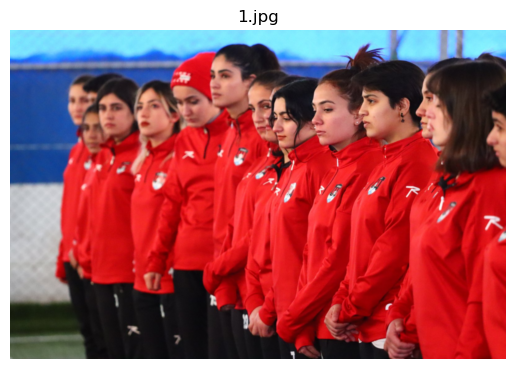

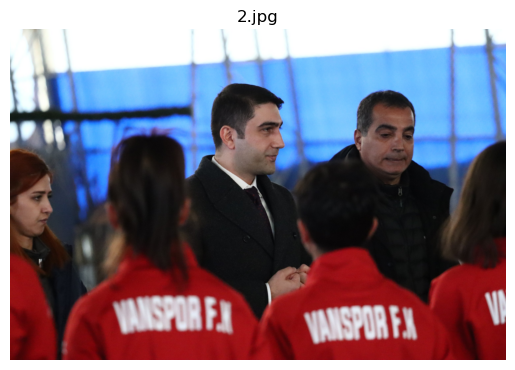

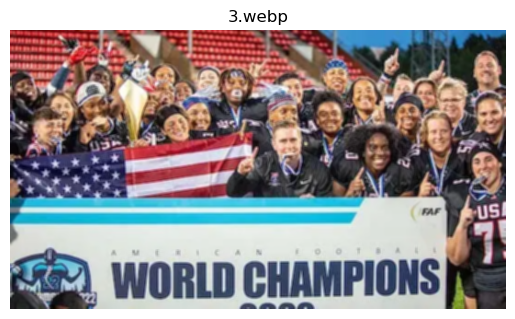

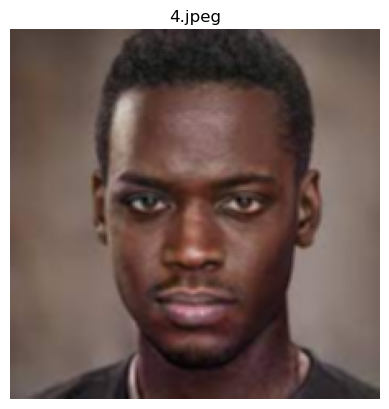

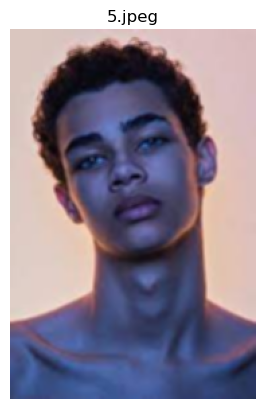

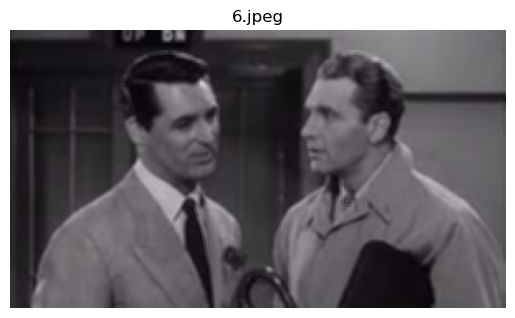

In [7]:
test_kernels(input_dir)

# Analyze Images & Display The Recognized FrontFaces with Some Calarifications While Saving Them

No front face detected in 1.jpg.
No front face detected in 2.jpg.
No front face detected in 3.webp.
Front face detected in 4.jpeg.


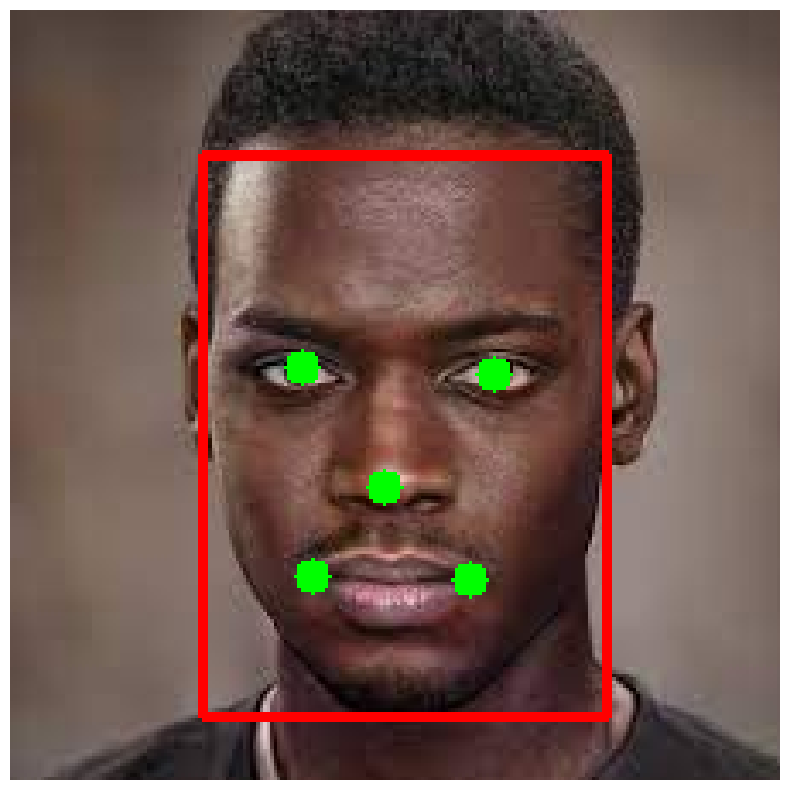

{'eye_distance': 55.529194, 'nose_to_eye_mid': 33.863677978515625, 'eye_nose_diff': 3.5545806884765625, 'mouth_nose_diff': 1.73541259765625}
{'eye_distance': True, 'nose_to_eye_mid': True, 'eye_nose_diff': True, 'mouth_nose_diff': True}
Front face detected in 5.jpeg.


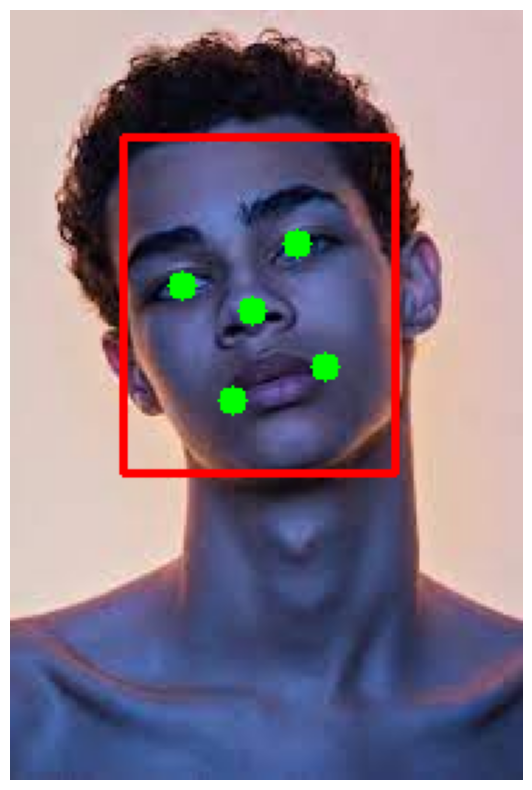

{'eye_distance': 43.60657, 'nose_to_eye_mid': 17.07343292236328, 'eye_nose_diff': -4.547126770019531, 'mouth_nose_diff': 9.821258544921875}
{'eye_distance': True, 'nose_to_eye_mid': True, 'eye_nose_diff': True, 'mouth_nose_diff': True}
No front face detected in 6.jpeg.


In [8]:
filter_frontfaces(input_dir, output_dir)